# SR3

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pylops
import pyproximal

from pyproximal.optimization.sr3 import SR3

In [2]:
# As a test case, I implemented the gravity example
def gravity(n):
    # GRAVITY Test problem: 1-D gravity surveying model problem
    #
    # [A,b,x] = gravity(n,example,a,b,d)
    #
    # Discretization of a 1-D model problem in gravity surveying, in which
    # a mass distribution f(t) is located at depth d, while the vertical
    # component of the gravity field g(s) is measured at the surface.
    #
    # The resulting problem is a first-kind Fredholm integral equation
    # with kernel
    #    K(s,t) = d*(d^2 + (s-t)^2)^(-3/2) .
    # The following three examples are implemented (example = 1 is default):
    #    1: f(t) = sin(pi*t) + 0.5*sin(2*pi*t),
    #    2: f(t) = piecewise linear function,
    #    3: f(t) = piecewise constant function.
    # The problem is discretized by means of the midpoint quadrature rule
    # with n points, leading to the matrix A and the vector x.  Then the
    # right-hand side is computed as b = A*x.
    #
    # The t integration interval is fixed to [0,1], while the s integration
    # interval [a,b] can be specified by the user. The default interval is
    # [0,1], leading to a symmetric Toeplitz matrix.
    #
    # The parameter d is the depth at which the magnetic deposit is located,
    # and the default value is d = 0.25. The larger the d, the faster the
    # decay of the singular values.

    # Reference: G. M. Wing and J. D. Zahrt, "A Primer on Integral Equations
    # of the First Kind", SIAM, Philadelphia, 1991; p. 17.

    # Per Christian Hansen, IMM, November 18, 2001.

    # Initialization.
    a = 0
    b = 1
    d = 0.25

    # Set up abscissas and matrix.
    dt = 1/n
    ds = (b-a)/n
    t = dt*(np.linspace(1, n, n) - 0.5)
    s = a + ds*(np.linspace(1, n, n) - 0.5)
    T, S = np.meshgrid(t, s)
    A = dt*d*np.ones((n, n))/(d**2 + (S-T)**2)**(3/2)

    # Set up solution vector and right-hand side.
    # nt = int(np.round(n/3))
    # nn = np.round(n*7/8)
    # x = np.zeros((n, 1))
    # x[0:nt] = 2*np.ones((nt, 1))
    x = np.heaviside(t - 0.2, 1) + 2.1*np.heaviside(t - 0.4, 1) - 1.2*np.heaviside(t - 0.7, 1)
    x = x
    b = np.dot(A, x)

    return A, b, x

In [3]:
n = 64
A, b, x = gravity(n)
#L = np.diag(-np.ones(n), 0) + np.diag(np.ones(n-1), 1)
#L = L[:len(x)-1][:]
#Lop = pylops.MatrixMult(L)

Aop = pylops.MatrixMult(A)
Lop = pylops.FirstDerivative(n, kind='forward')

Relative error for SR3: 0.0016151806175149237


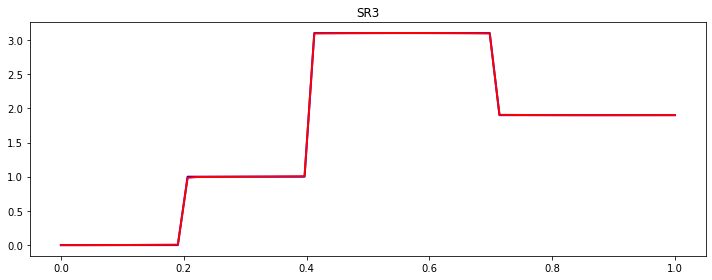

In [4]:
x_sr3 = SR3(Aop, Lop, b, 1, 1e-3, iter_lim_outer=int(1e4), adaptive=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
x_plot = np.linspace(0, 1, n)
ax.plot(x_plot, x, color='b', linewidth=2)
ax.plot(x_plot, x_sr3, color='r', linewidth=2)
ax.set_title('SR3')
ax.axis('tight')
fig.tight_layout()

print('Relative error for SR3:', np.linalg.norm(x - x_sr3)/(np.linalg.norm(x)))

Relative error for SR3: 0.0014969011081686428


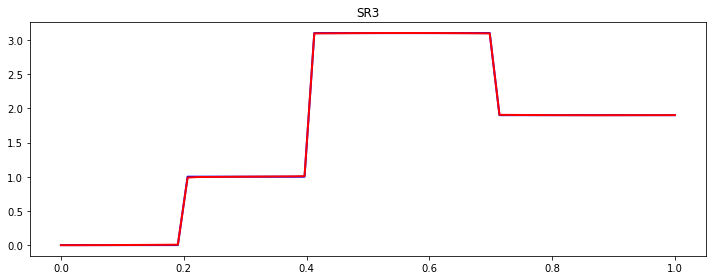

In [5]:
x_sr3 = SR3(Aop, Lop, b, 1, 1e-3, iter_lim_outer=int(1e4), adaptive=False)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
x_plot = np.linspace(0, 1, n)
ax.plot(x_plot, x, color='b', linewidth=2)
ax.plot(x_plot, x_sr3, color='r', linewidth=2)
ax.set_title('SR3')
ax.axis('tight')
fig.tight_layout()

print('Relative error for SR3:', np.linalg.norm(x - x_sr3)/(np.linalg.norm(x)))